***Linear Regression at Codecademy***

For this project, you’ll get to work as a data analyst alongside the curriculum team at Codecademy to help us improve the learner experience. While this data is simulated, it is similar to real data that we might want to investigate as Codecademy team members!

1. Let's load libraries and inspect data first

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Read in the data
codecademy = pd.read_csv('codecademy.csv')

#1 Print the first five rows
print(codecademy.head())

   score  completed    lesson
0   82.7       35.0  Lesson A
1   65.2       31.0  Lesson A
2   55.3       33.0  Lesson A
3   28.8       25.0  Lesson B
4   31.2       18.0  Lesson B


2. Plot a scatter plot of score (y-axis) against completed (x-axis) to see the relationship between quiz score and number of completed content items.
Is there a relationship between these two variables, and does it appear to be linear?

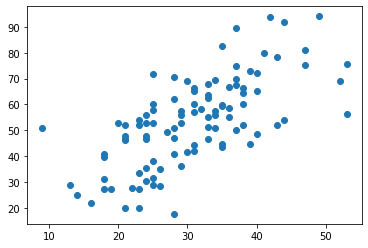

<function matplotlib.pyplot.clf()>

In [2]:
plt.scatter(codecademy.completed, codecademy.score)
# Show then clear plot
plt.show()
plt.clf

3. Create and fit a linear regression model that predicts score using completed as the predictor. Print out the regression coefficients.

In [3]:
model = sm.OLS.from_formula('score ~ completed', data = codecademy).fit()
print(model.params)

Intercept    13.214113
completed     1.306826
dtype: float64


4. Write a one-sentence (each) interpretation of the slope and intercept that you printed out in the previous step. 

In [4]:
# Intercept interpretation:
print("Average score at 0% completed is {}".format(round(model.params[0],1)))
# Slope interpretation:
print("1% completed provides additional {} points to the score".format(round(model.params[1],1)))

Average score at 0% completed is 13.2
1% completed provides additional 1.3 points to the score


5. Plot the same scatter plot that you made earlier (with score on the y-axis and completed on the x-axis), but this time add the regression line on top of the plot.

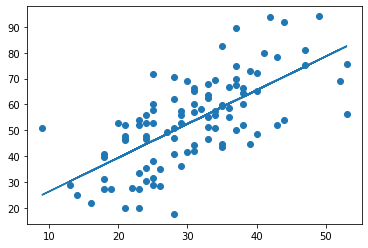

<Figure size 432x288 with 0 Axes>

In [5]:
plt.scatter(codecademy.completed, codecademy.score)
plt.plot(codecademy.completed, model.predict(codecademy))
# Show then clear plot
plt.show()
plt.clf()

6. 
Use your model to calculate the predicted quiz score for a learner who has previously completed 20 other content items.

In [6]:
pred_20 = model.predict({'completed':[20]})
print("Predicted quiz score for learner who completed 20% equals to {}".format(round(pred_20[0],1)))

Predicted quiz score for learner who completed 20% equals to 39.4


7. 
Calculate the fitted values for your model and save them as fitted_values.

In [7]:
fitted_values = model.predict(codecademy)

8. Calculate the residuals for the model and save the result as residuals.

In [8]:
residuals = codecademy.score - fitted_values

9. 
Check the normality assumption for linear regression by plotting a histogram of the residuals. 
Do the residuals appear to be approximately normally distributed?

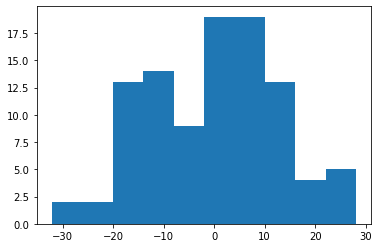

These residuals appear normally distributed, leading us to conclude that the normality assumption is satisfied.


<Figure size 432x288 with 0 Axes>

In [9]:
plt.hist(residuals)
# Show then clear the plot
plt.show()
plt.clf()
print("These residuals appear normally distributed, leading us to conclude that the normality assumption is satisfied.")

10. 
Check the homoscedasticity assumption for linear regression by plotting the residuals (y-axis) against the fitted values (x-axis).
Do you see any patterns or is the homoscedasticity assumption met?

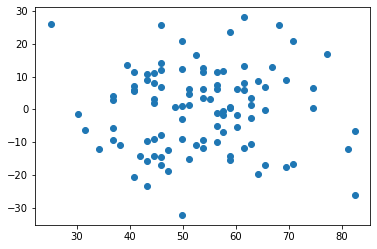

The homoscedasticity assumption is met, this plot looks like a random splatter of points, centered around y=0.


<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(fitted_values, residuals)
# Show then clear the plot
plt.show()
plt.clf()
print("The homoscedasticity assumption is met, this plot looks like a random splatter of points, centered around y=0.")

11. Let’s now turn our attention to the lessons column to see if learners who took different lessons scored differently on the quiz.

Use sns.boxplot to create a boxplot of score (y-variable) for each lesson (x-variable) to see the relationship between quiz score and which lesson the learner completed immediately before taking the quiz. Make sure to show, then clear the plot.

Does one lesson appear to do a better job than the other of preparing students for this quiz? If so, which one?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


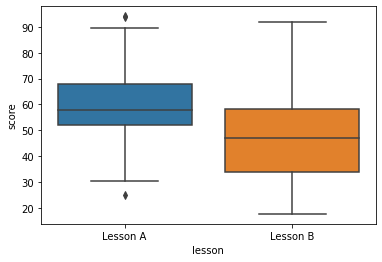

By looking at boxplot we can conclude that average score after lesson A is higher than lesson B.


<Figure size 432x288 with 0 Axes>

In [11]:
sns.boxplot(codecademy.lesson, codecademy.score)
# Show then clear plot
plt.show()
plt.clf()
print("By looking at boxplot we can conclude that average score after lesson A is higher than lesson B.")

12. Create and fit a linear regression model that predicts score using lesson as the predictor. Print out the regression coefficients.

In [12]:
model_sc_using_les = sm.OLS.from_formula('score ~ lesson', data = codecademy).fit()
print("Intercept(Lesson A mean): {}, Slope (difference between Lesson A mean and Lesson B mean): {}".format(model_sc_using_les.params[0], model_sc_using_les.params[1]))

Intercept(Lesson A mean): 59.21999999999999, Slope (difference between Lesson A mean and Lesson B mean): -11.642000000000007


13. Calculate and print out the mean quiz scores for learners who took lesson A and lesson B.
Calculate and print out the mean difference.
Can you see how these numbers relate to the intercept and slope that you printed out in the linear regression output?

In [13]:
lesson_A_mean = codecademy.groupby('lesson').mean().score[0]
lesson_B_mean = codecademy.groupby('lesson').mean().score[1]
print("Lesson A average score is {}".format(lesson_A_mean))
print("Lesson B average score is {}".format(lesson_B_mean))
print("Lesson difference is {}".format(lesson_A_mean-lesson_B_mean))

Lesson A average score is 59.22
Lesson B average score is 47.578
Lesson difference is 11.641999999999996


14. The next step in linear regression is to model quiz scores as a function of multiple other variables at once! To get a preview of what this might look like visually, let’s try using seaborn‘s lmplot() function to plot a scatter plot of score vs. completed, colored by lesson. For context, the lm in lmplot() stands for “linear model”. This function will automatically plot a linear regression model on top of the scatter plot.
Note that when we include a third variable in our plot using the hue parameter (which controls the color of each point in the scatter plot), something interesting happens! All of a sudden, we end up with multiple regression lines.

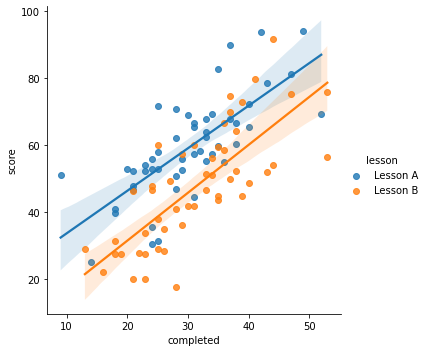

<Figure size 432x288 with 0 Axes>

In [14]:
sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = codecademy)
plt.show()
plt.clf()